In [2]:
#Load libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
df = pd.read_csv('../data/user_loggedin_teacher.csv', delimiter=',')
df_copy = df.copy()

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18949 entries, 0 to 18948
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18949 non-null  int64 
 1   id           18949 non-null  int64 
 2   department   17846 non-null  object
 3   timecreated  18949 non-null  int64 
 4   rol          18949 non-null  object
 5   userid       18949 non-null  object
dtypes: int64(3), object(3)
memory usage: 888.4+ KB


In [5]:
df_copy['department'].unique()

array(['Departamento De Español y Literatura',
       'Departamento De Informática Educativa',
       'Departamento de Salud Pública', nan, 'Dpto De Ciencias Naturales',
       'Departamento De Ciencias Jurídicas',
       'Departamento De Ingeniería Industrial',
       'Dpto De Ing Agronómica Y Desarroll Rural',
       'Dpto Ciencias Administrativas', 'Departamento De Enfermería',
       'Departamento De Idiomas Extranjeros', 'Departamento De Química',
       'Dpto De Ing De Sistemas Y Telecomunicaci',
       'Departamento De Matemáticas Y Estadístic',
       'Departamento de Regencía Y Farmacia', 'Departamento De Biología',
       'Departamento de Psicopedagogía', 'Dpto De Ingeniería Ambiental',
       'Dpto De Cultura Física, Recreac Y Deport',
       'Departamento De Ciencias Pecuarías',
       'Departamento De Geografía Y Medio Ambien',
       'Departamento De Bacteriología',
       'Departamento de Física y Electrónica', ' Ingeniería Mecánica',
       'ENFERMERÍA', 'Departamento D

In [6]:
# 1. Clear the Departament column
df_copy = df_copy.dropna(subset=['department'])
df_copy['department'] = df_copy['department'].str.lower()
df_copy['department'] = df_copy['department'].str.strip()
correcciones = {
    'dpto': 'departamento',
    'departamento de informtica educativa': 'departamento de informática educativa',
    'departamento de ciencias acuicolas': 'departamento de ciencias acuícolas',
    'departamento de fisica y electronica': 'departamento de física y electrónica',
    'departamento de ingenieria ambiental': 'departamento de ingeniería ambiental',
    'departamento ciencias administrativas': 'departamento de ciencias administrativas',
    'licenciatura en informática': 'departamento de informática educativa',
    'enfermería': 'departamento de enfermería',
    'informática': 'departamento de informática educativa',
    'regencia de farmacia': 'departamento de regencia y farmacia',
    'ingeniería': 'departamento de ingeniería general',
    'ing': 'ingeniería',
    'desarroll': 'desarrollo',
    'telecomunicaci': 'telecomunicaciones',
    'estadístic': 'estadística',
    'recreac': 'recreación',
    'deport': 'deporte',
    'ambien': 'ambiente',
    'lic': 'licenciatura',
    'jurdicas': 'jurídicas',
    'geografa': 'geografía',
    'fsica': 'física',
    'biologia': 'biología',
    'regencía': 'regencia',
    'informatica': 'informática',
    'publica': 'pública',
    'pblica': 'pública',
    'bacteriologia': 'bacteriología',
    'psicopedagogia': 'psicopedagogía',
    'psicopedagoga': 'psicopedagogía',
    'enfermeria': 'enfermería',
    'matematica': 'matemáticas',
    'estadistica': 'estadística',
}

for key, value in correcciones.items():
    df_copy['department'] = df_copy['department'].str.replace(r'\b' + key + r'\b', value, regex=True)

df_copy['department'] = df_copy['department'].str.replace(r'\s*d\s*p$', '', regex=True)

df_copy['department'] = df_copy['department'].apply(
    lambda x: f"departamento de {x.split('departamento de ')[-1]}" if not x.startswith('departamento de') else x
)

df_copy['department'] = df_copy['department'].apply(
    lambda x: ' '.join(sorted(set(x.split()), key=x.split().index))  # eliminar duplicados
)
df_copy['department'].unique()

array(['departamento de español y literatura',
       'departamento de informática educativa',
       'departamento de salud pública',
       'departamento de ciencias naturales',
       'departamento de ciencias jurídicas',
       'departamento de ingeniería general industrial',
       'departamento de ingeniería agronómica y desarrollo rural',
       'departamento de ciencias administrativas',
       'departamento de enfermería',
       'departamento de idiomas extranjeros', 'departamento de química',
       'departamento de ingeniería sistemas y telecomunicaciones',
       'departamento de matemáticas y estadística',
       'departamento de regencia y farmacia', 'departamento de biología',
       'departamento de psicopedagogía',
       'departamento de ingeniería general ambiental',
       'departamento de cultura física, recreación y deporte',
       'departamento de ciencias pecuarías',
       'departamento de geografía y medio ambiente',
       'departamento de bacteriología',
 

C:\Users\Jose\AppData\Local\Temp\ipykernel_6672\3099985861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_logins', y='department', data=total_logins, palette='viridis')


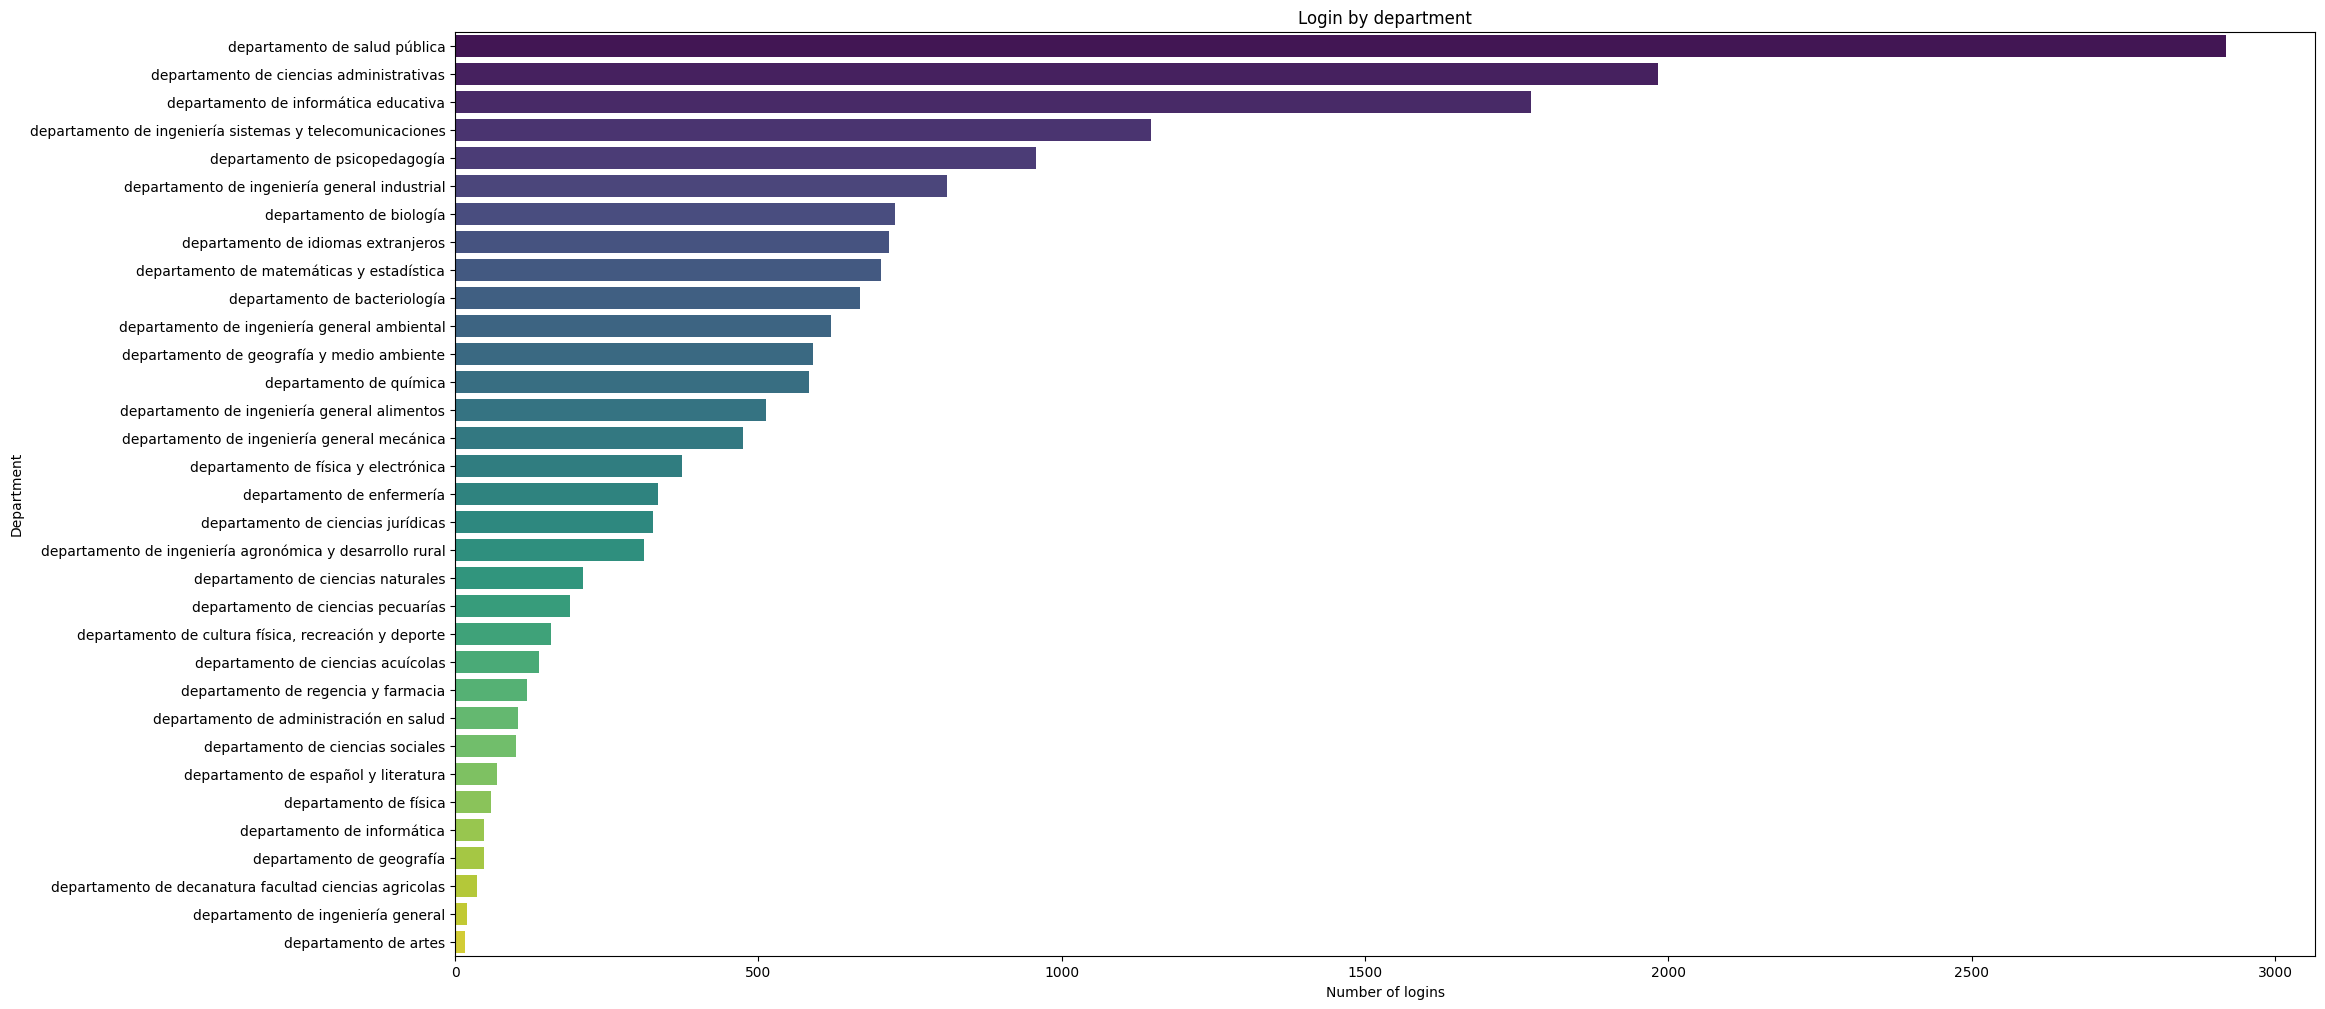

In [7]:
# 2. Show total Login by department and bar graph
# 4. Login bar graph by department
total_logins = df_copy.groupby('department')['userid'].count().reset_index()
total_logins.columns = ['department', 'total_logins']
total_logins = total_logins.sort_values(by='total_logins', ascending=False)

plt.figure(figsize=(24, 12))
sns.barplot(x='total_logins', y='department', data=total_logins, palette='viridis')
plt.title('Login by department')
plt.xlabel('Number of logins')
plt.ylabel('Department')
plt.show()

In [8]:
# 3. Display the total number of logins per teacher in a specific program
specific_program = 'departamento de física y electrónica'
df_program = df_copy[df_copy['department'] == specific_program]
logins_per_teacher = df_program['id'].value_counts()
logins_per_teacher

id
492      120
510       78
585       39
586       38
499       31
507       28
409       12
495       11
16465      7
502        6
491        2
496        1
14497      1
Name: count, dtype: int64

C:\Users\Jose\AppData\Local\Temp\ipykernel_6672\780986231.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='department', y='session_count', data=session_counts, palette='viridis')


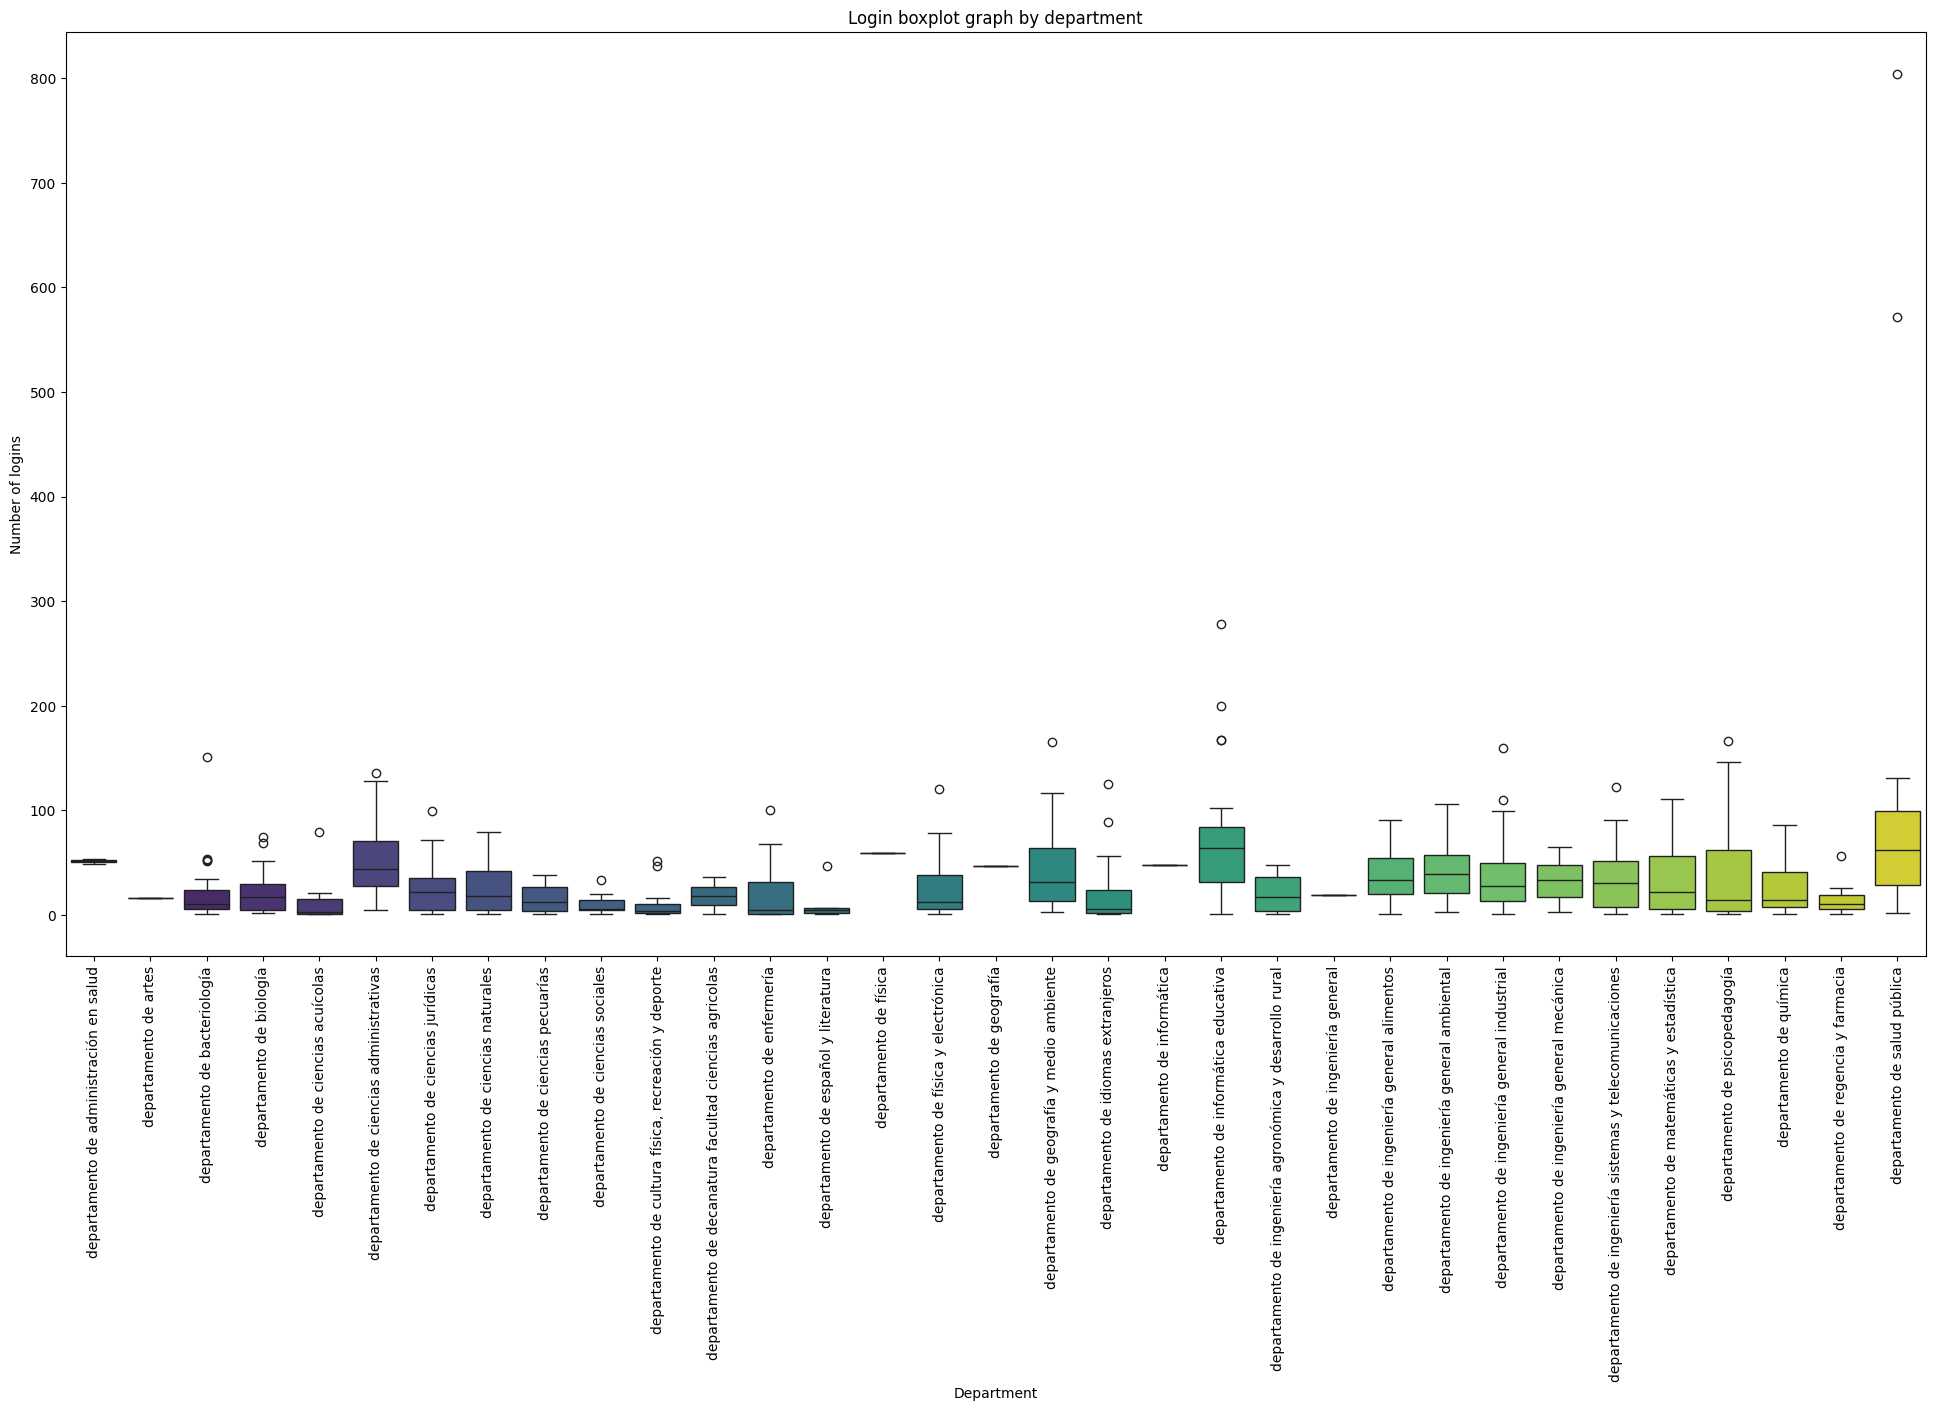

In [9]:
# 5. Login boxplot graph by department

session_counts = df_copy.groupby(['department', 'userid']).size().reset_index(name='session_count')

plt.figure(figsize=(24, 12))
sns.boxplot(x='department', y='session_count', data=session_counts, palette='viridis')
plt.title('Login boxplot graph by department')
plt.xlabel('Department')
plt.ylabel('Number of logins')
plt.xticks(rotation=90)
plt.show()

In [10]:
# 6. Login average by department
logins_per_user = df_copy.groupby(['department', 'id']).size().reset_index(name='logins')
average = logins_per_user.groupby('department')['logins'].mean().reset_index()
average

,department,logins
0,departamento de administración en salud,51.500000
1,departamento de artes,16.000000
2,departamento de bacteriología,20.242424
3,departamento de biología,21.969697
4,departamento de ciencias acuícolas,13.800000
5,departamento de ciencias administrativas,50.846154
6,departamento de ciencias jurídicas,29.636364
7,departamento de ciencias naturales,26.375000
8,departamento de ciencias pecuarías,15.750000
9,departamento de ciencias sociales,10.100000


In [11]:
# 7. Quartiles of teachers by department
quartiles_per_department = logins_per_user.groupby('department')['logins'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles_per_department.columns = ['Q1', 'Q2', 'Q3']
quartiles_per_department

,Q1,Q2,Q3
department,,,
departamento de administración en salud,50.25,51.5,52.75
departamento de artes,16.00,16.0,16.00
departamento de bacteriología,6.00,11.0,24.00
departamento de biología,5.00,17.0,30.00
departamento de ciencias acuícolas,1.00,3.0,15.00
departamento de ciencias administrativas,28.00,44.0,70.50
departamento de ciencias jurídicas,5.00,22.0,35.50
departamento de ciencias naturales,4.75,18.5,41.75
departamento de ciencias pecuarías,3.50,12.5,26.75


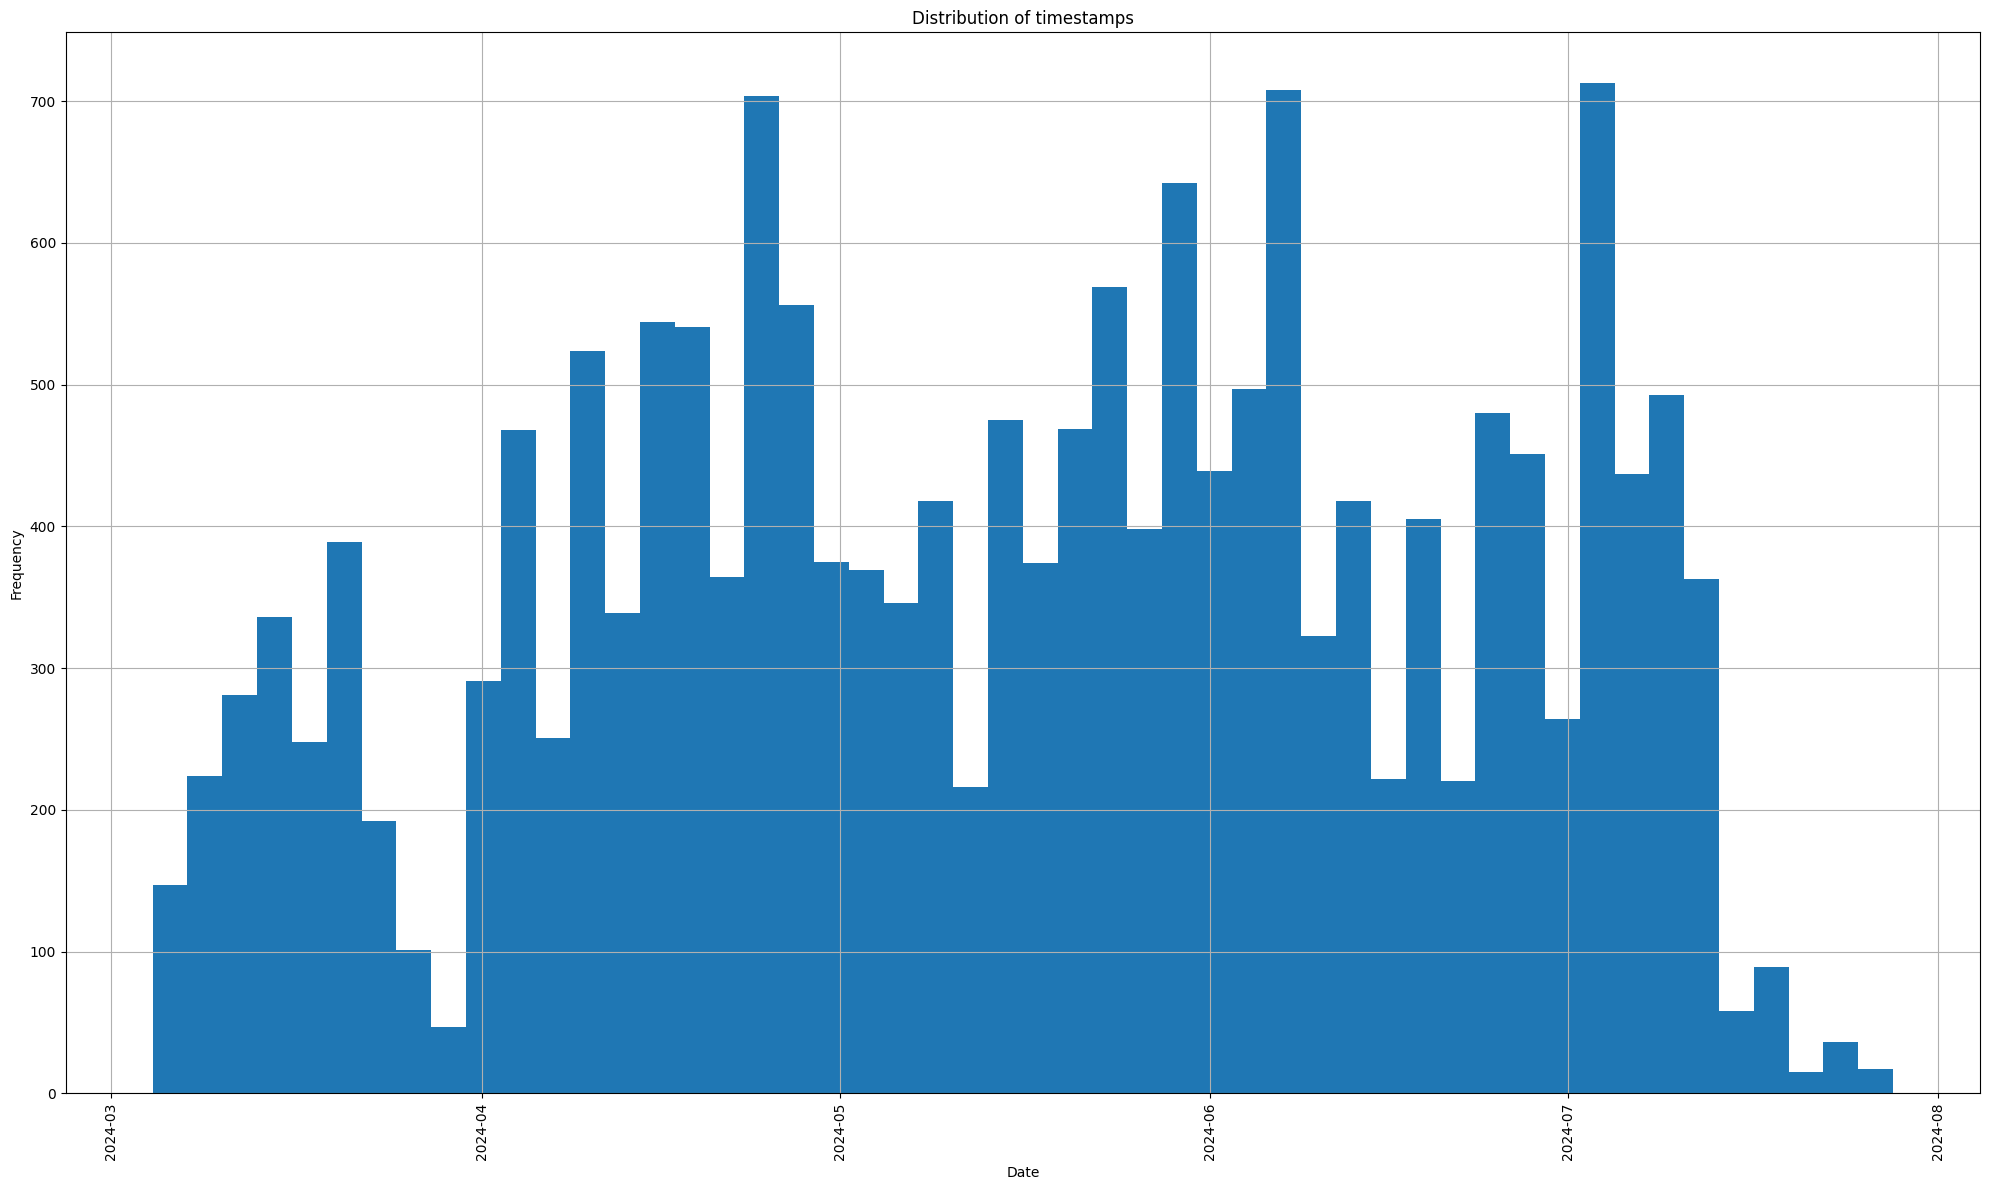

In [12]:
# Histogram of timestamp distribution
df_copy['timecreated'] = pd.to_datetime(df_copy['timecreated'], unit='s')

plt.figure(figsize=(20, 12))
df_copy['timecreated'].hist(bins=50)
plt.title('Distribution of timestamps')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

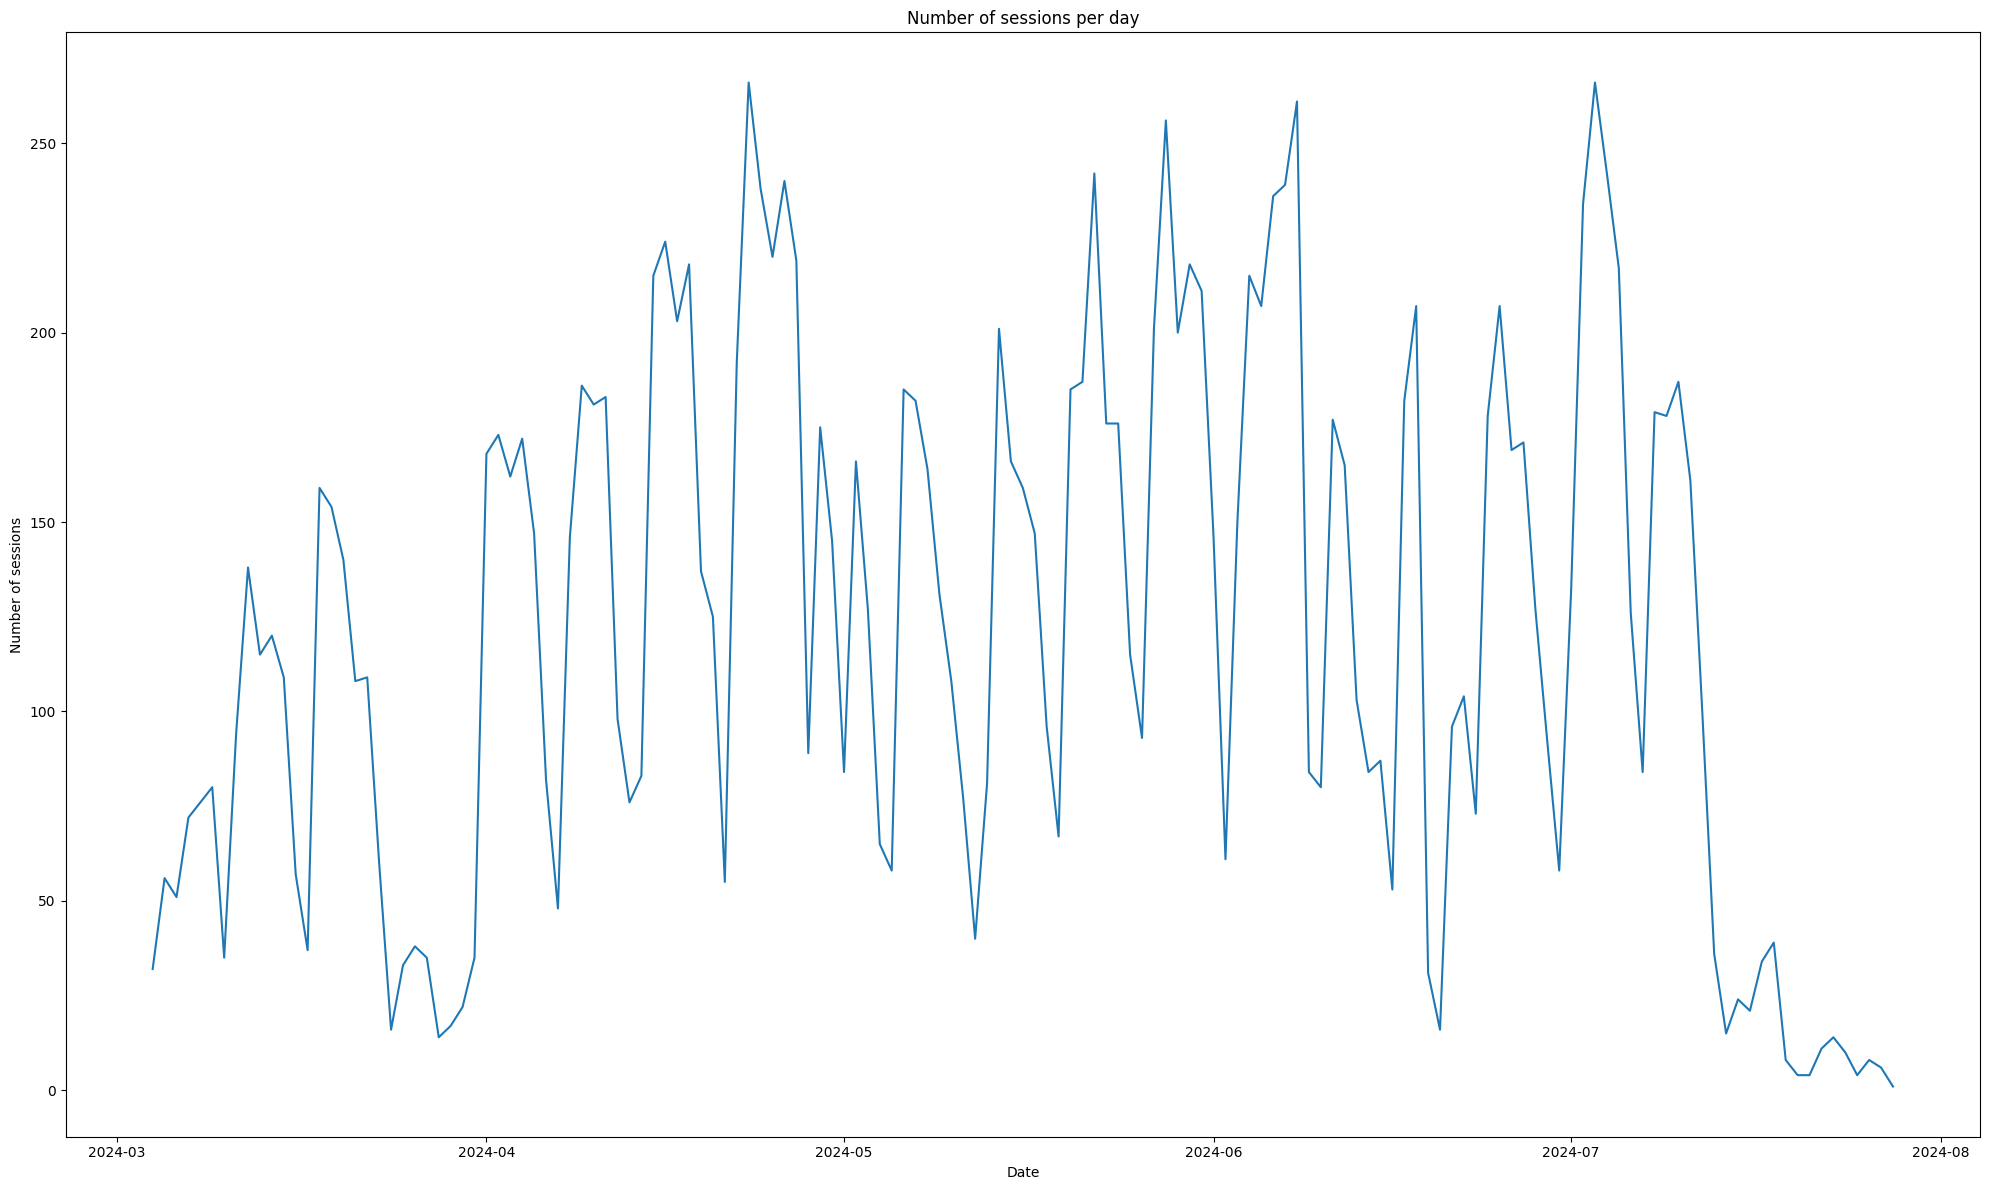

In [13]:
# Line chart to see date trends
df_copy['date'] = df_copy['timecreated'].dt.date
sessions_per_day = df_copy.groupby('date').size()

plt.figure(figsize=(20, 12))
sessions_per_day.plot(kind='line')
plt.title('Number of sessions per day')
plt.xlabel('Date')
plt.ylabel('Number of sessions')
plt.tight_layout()
plt.show()

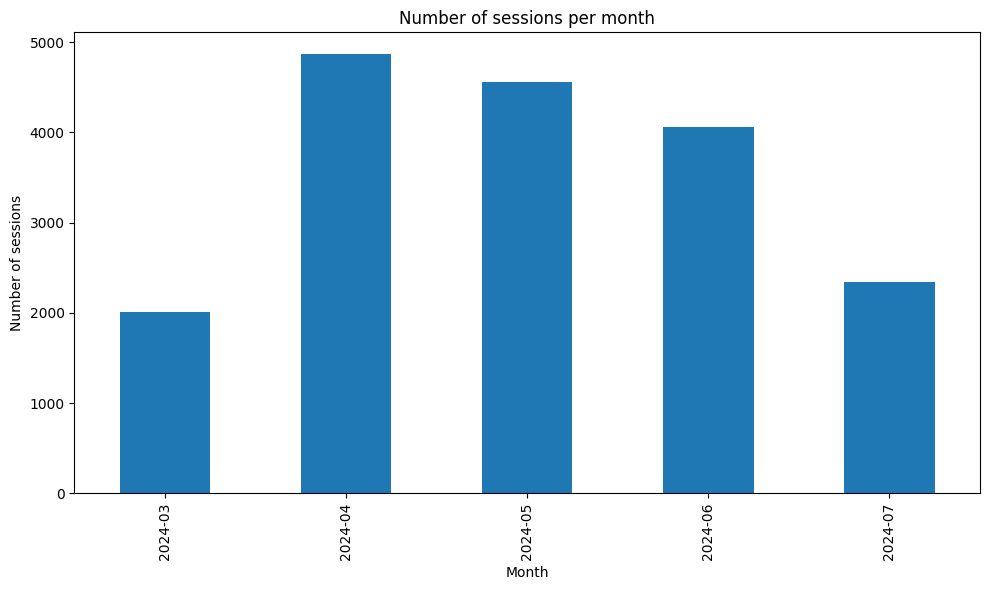

In [14]:
# Bar chart by month
df_copy['month'] = df_copy['timecreated'].dt.to_period('M')
sessions_per_month = df_copy.groupby('month').size()

plt.figure(figsize=(10, 6))
sessions_per_month.plot(kind='bar')
plt.title('Number of sessions per month')
plt.xlabel('Month')
plt.ylabel('Number of sessions')
plt.tight_layout()
plt.show()